C:\Users\sanko\AppData\Local\Temp\ipykernel_15284\2738445549.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  xFFT[:,i] = fftshift(fft(f[:, i], N))


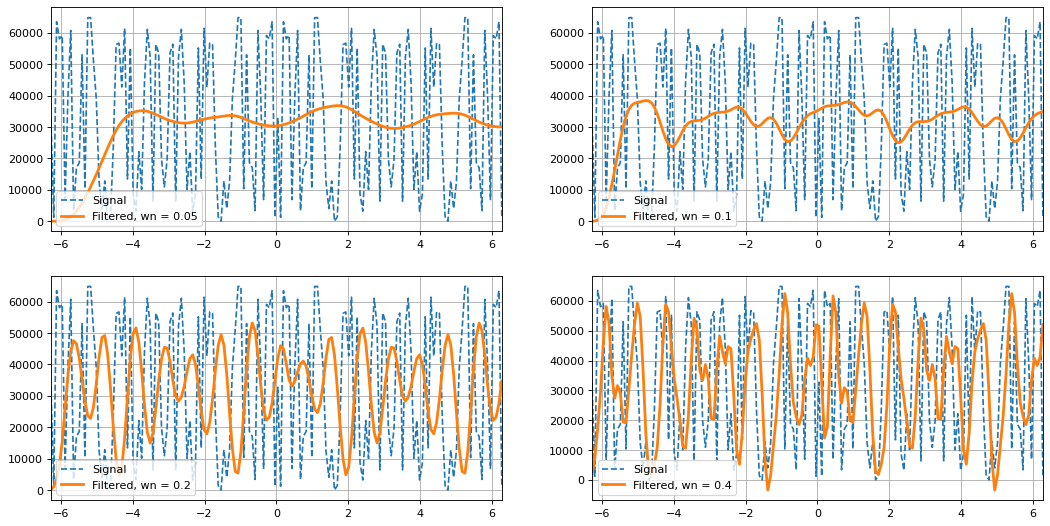

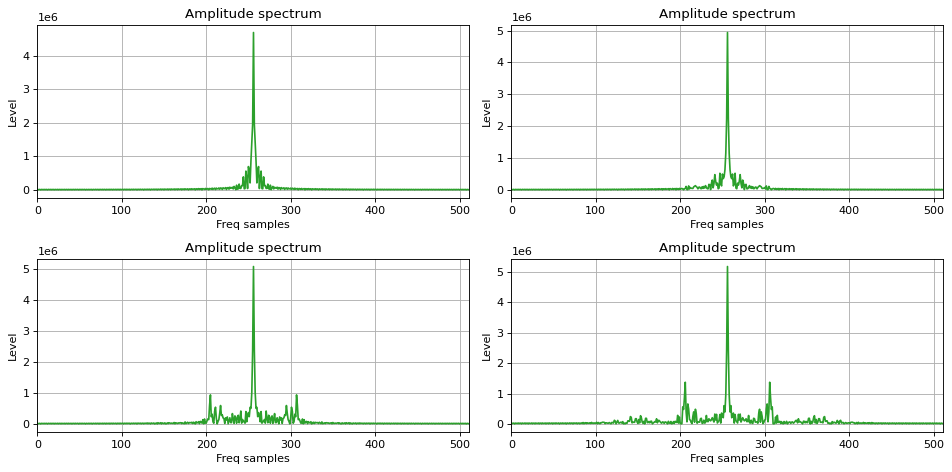

In [21]:
# Source: https://nbviewer.org/github/hukenovs/dsp-theory/blob/master/src/dsp_theory_6_iir_fir_filters.ipynb?flush_cache=True
# Source: https://github.com/hukenovs/dsp-theory

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, butter
from scipy.fftpack import fft, fftshift

%matplotlib inline

# Create input signal
t = 2 * np.pi * np.linspace(-1, 1, 160)

xn = np.array([0x7FDE,0x04CF,0xF7FD,0xE2D4,0xE6F3,0x1AE5,0x9A5F,0xED44,0x0D2C,0x42A1,
0x48C3,0xCEF2,0x2889,0xFD21,0xFD3E,0xC78E,0x988E,0x30AC,0x0FBB,0x3216,
0x0000,0x058B,0x5BAF,0xDBB1,0xDD85,0xA6EE,0xEFE8,0x347D,0xD778,0x21D4,
0x0C7C,0x5688,0x2784,0xAC72,0xEE91,0xCC24,0x190E,0xDC23,0xD14A,0x4D7E,
0x2A9F,0x4D7E,0xD14A,0xDC23,0x190E,0xCC24,0xEE91,0xAC72,0x2783,0x5688,
0x0C7C,0x21D4,0xD778,0x347D,0xEFE8,0xA6EE,0xDD85,0xDBB1,0x5BAF,0x058C,
0x0000,0x3216,0x0FBB,0x30AC,0x988F,0xC78E,0xFD3E,0xFD21,0x2889,0xCEF2,
0x48C3,0x42A1,0x0D2C,0xED44,0x9A5F,0x1AE5,0xE6F4,0xE2D3,0xF7FD,0x04CF,
0x7FDE,0x04CF,0xF7FD,0xE2D4,0xE6F3,0x1AE5,0x9A5F,0xED44,0x0D2C,0x42A1,
0x48C3,0xCEF2,0x2889,0xFD21,0xFD3E,0xC78E,0x988E,0x30AB,0x0FBB,0x3216,
0x0000,0x058B,0x5BAF,0xDBB1,0xDD85,0xA6EF,0xEFE8,0x347D,0xD778,0x21D4,
0x0C7C,0x5688,0x2784,0xAC72,0xEE91,0xCC24,0x190D,0xDC24,0xD149,0x4D7E,
0x2A9F,0x4D7E,0xD14A,0xDC23,0x190E,0xCC24,0xEE91,0xAC72,0x2783,0x5688,
0x0C7C,0x21D4,0xD778,0x347D,0xEFE8,0xA6EE,0xDD86,0xDBB1,0x5BAF,0x058C,
0x0000,0x3216,0x0FBB,0x30AC,0x988F,0xC78D,0xFD3E,0xFD21,0x2889,0xCEF1,
0x48C3,0x42A2,0x0D2C,0xED44,0x9A5F,0x1AE5,0xE6F4,0xE2D3,0xF7FD,0x04CF])

# 4-order lowpass butterworth filter with parameters below
b, a = butter(4, 0.05)
c = lfilter(b, a, xn)

wn = [0.05, 0.1, 0.2, 0.4]   #you can change cutoff frequency of 4 probes

# Calculate IIR filter
f = np.zeros((t.size, 4))
N = 512                     #you can change from 32 to 4096 (power of 2) for spectrum
xFFT = np.zeros((N,4))
xA = np.zeros((N,4))

for i in range(4):
    b, a = butter(4, wn[i])
    f[:, i] = lfilter(b, a, xn)

# Forward FFT
    xFFT[:,i] = fftshift(fft(f[:, i], N))
# Amplitude spectrum
    xA[:,i] = np.abs(xFFT[:,i])    

lst_title = 'Amplitude spectrum'

# Plot results
plt.figure(figsize=(16, 8), dpi=80)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(t, xn, 'C0--', linewidth=1.5)
    plt.plot(t, f[:, i], 'C1', linewidth=2.5)
    plt.xlim([-2 * np.pi, 2 * np.pi])
    plt.grid(True)
    plt.legend(('Signal', 'Filtered, wn = {}'.format(wn[i])), loc='lower left')

# Plot results
fig = plt.figure(figsize=(12, 6), dpi=80)
for i in range(4):
    plt.subplot(2, 2, i+1)  
    plt.plot(xA[:,i], 'C2')
    plt.xlabel('Freq samples')
    plt.ylabel('Level')
    plt.xlim([0, N-1])
    plt.title(lst_title)
    plt.grid()
    plt.tight_layout()
